In [1]:
! pip install sentence-transformers

In [2]:
# handle imports
import tkinter as tk
import pandas as pd
from tkinter import ttk, messagebox
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [3]:
def load_data():
    # load data for new data
    news_data2 = pd.read_csv('sentiment_news_data2.csv')

    # for empty strings replace with NaN
    news_data2 = news_data2.fillna('')

    all_entries = []

    # loop and add entry/entries to the list
    for i in range(1, 26):
        # get top 1 to 25 for top, sen_top, date
        col  = f'Top{i}'
        col2 = f'Sen_Top{i}'
        col3 = f'Date'
        col_data = news_data2[col]
        col_data2 = news_data2[col2]
        col_data3 = news_data2[col3]
        # loop to add append this data
        for j in range(len(col_data)):
            all_entries.append([col_data[j], col_data2[j], col_data3[j]])
    return all_entries

# print(all_entries[0:5])


In [4]:
# load stock data from file
def load_stock_data(path):
    data = pd.read_csv(path)
    # convert dates, convert invalids dates using coerce options
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    return data


# get stock from a date and day(s) range
def get_stocks(date, stock_data, days):
    # get start and end date, then use it to filter stock
    start = pd.to_datetime(date)
    end   = start + pd.Timedelta(days=days)
    filt  = stock_data[(stock_data['Date'] >= start) & (stock_data['Date'] <= end)]

    #print(start)
    #print(end)

    # calculte the stock delta, clear index too
    stock_delta = filt.groupby('Stocks').apply(lambda x: x.iloc[-1]['Close'] - x.iloc[0]['Close']).reset_index()
    stock_delta.columns = ['Stocks', 'Close_Delta']
    #print(stock_delta)
    return stock_delta


# display delta results
def display_delta():
    tick = tick_var.get()
    date = date_entry.get()
    # convert day range to int
    rng  = int(range_var.get())

    # get delta
    delta_data = get_stocks(date, stock_data, rng)
    tick_delta = delta_data[delta_data['Stocks'] == tick]
    tick_delta2 = tick_delta['Close_Delta'].values[0]
    #print(tick_delta)
    #print(tick_delta2)
    result_label.config(text=f"Delta for {tick}: {tick_delta2}")


# plot graph within GUI window
def plot_delta_graph():
    # global
    global canvas

    tick = tick_var.get()
    date = date_entry.get()
    rng  = int(range_var.get())

    # filter data from ticket and dates
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    start              = pd.to_datetime(date)
    end                = start + pd.Timedelta(days=rng)
    filt               = stock_data[(stock_data['Date'] >= start) & (stock_data['Date'] <= end)]
    tick_data          = filt[filt['Stocks'] == tick]
    # remove indexing
    tick_data = tick_data.reset_index(drop=True)

    # remove canvas if still in global
    if 'canvas' in globals():
        canvas.get_tk_widget().pack_forget()
        # reset canvas back to none
        canvas = None

    # create canvas
    fig, ax = plt.subplots(figsize=(12.5, 7.5))
    ax.plot(tick_data['Date'], tick_data['Close'])
    ax.set_title(f'Close Delta for {tick}')
    ax.grid(True)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')

    # put canvas in tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(pady=12.5)

C:\Users\vanvi\AppData\Local\Temp\ipykernel_13324\9283745.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_delta = filt.groupby('Stocks').apply(lambda x: x.iloc[-1]['Close'] - x.iloc[0]['Close']).reset_index()
C:\Users\vanvi\AppData\Local\Temp\ipykernel_13324\9283745.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_delta = filt.groupby('Stocks').apply(lambda x: x.iloc[-1]['Close'] - x.il

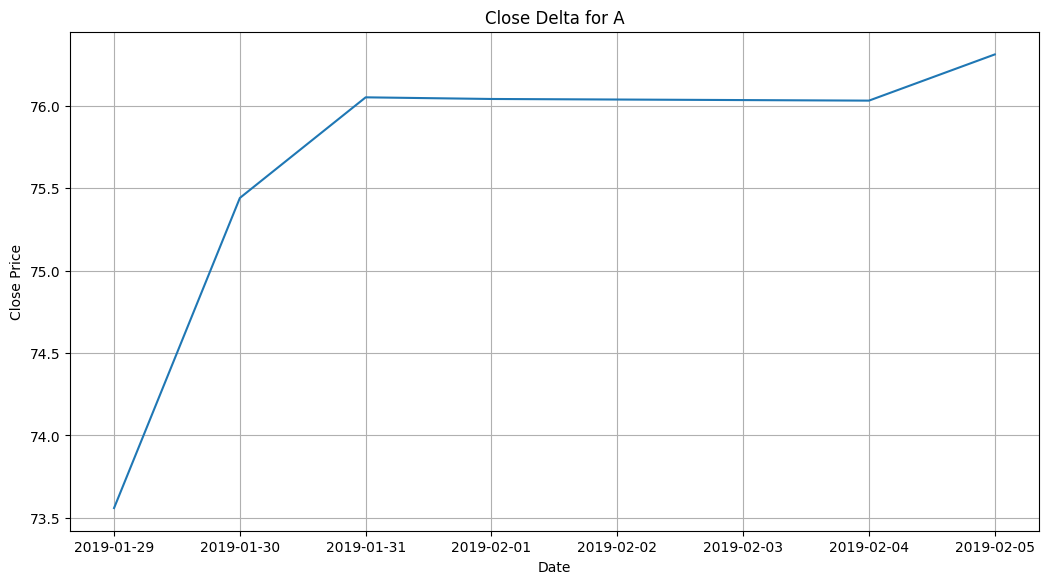

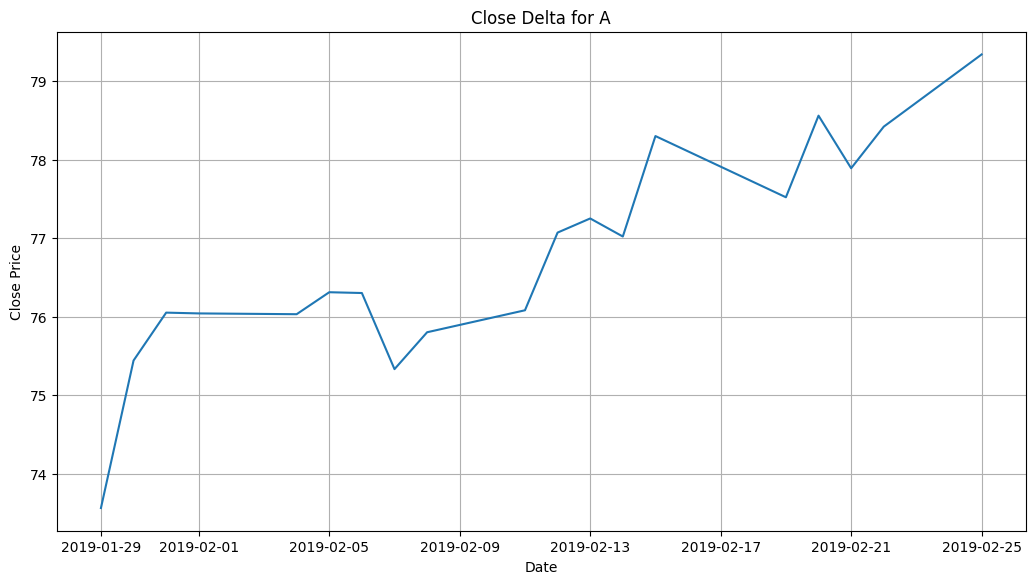

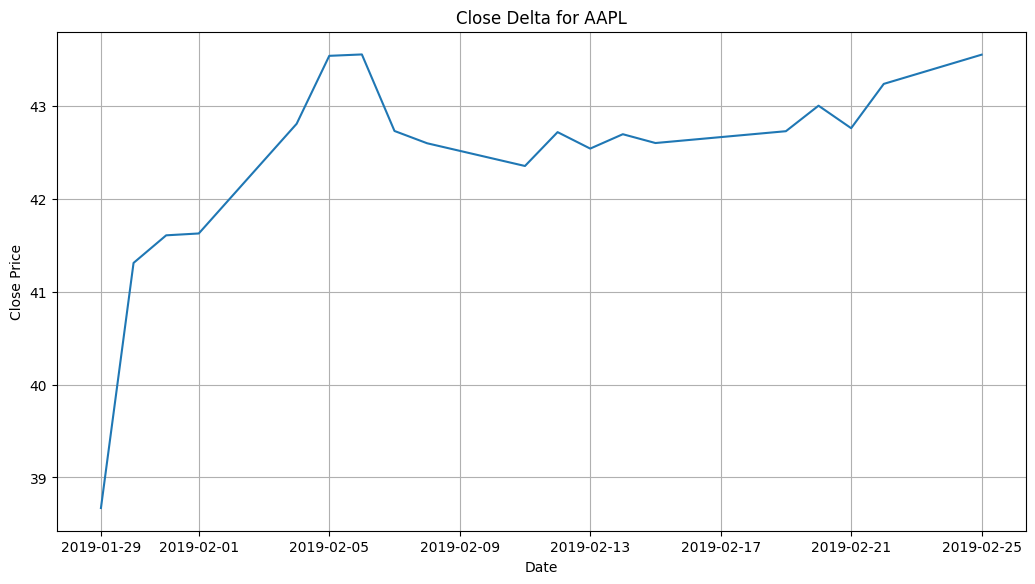

In [5]:
# Load in data
filepath = 'updated_stock_data.csv'
stock_data = load_stock_data(filepath)


# setup tk
root = tk.Tk()
root.title("Manual Delta Stock Search")

# ticker dropdown selection
tick_label = tk.Label(root, text="Select Stock Ticker:")
tick_label.pack(pady=10)
tick_var = tk.StringVar()
tick_combobox = ttk.Combobox(root, textvariable=tick_var)
# sort tickers alphabetically
ticks = sorted(stock_data['Stocks'].unique().tolist())
tick_combobox['values'] = ticks
tick_combobox['state'] = 'readonly'
tick_combobox.pack(pady=10)

# date enter, no check for out or range though
date_label = tk.Label(root, text="Input Date (YYYY-MM-DD):")
date_label.pack(pady=10)
date_entry = tk.Entry(root)
date_entry.pack(pady=10)

# range dropdown menu
range_label = tk.Label(root, text="Select Range (Days):")
range_label.pack(pady=10)
range_var = tk.StringVar()
# default is 7 days or a week
range_var.set("7")
# range from 1 to 30 days
range_dropdown = tk.OptionMenu(root, range_var, *[str(i) for i in range(1, 31)])
range_dropdown.pack(pady=10)

# for display delta button
display_button = tk.Button(root, text="Display Delta", command=display_delta)
display_button.pack(pady=10)

# for plot delta graph button
plot_button = tk.Button(root, text="Plot Delta Graph", command=plot_delta_graph)
plot_button.pack(pady=10)

# result display for delta
result_label = tk.Label(root, text="")
result_label.pack(pady=10)

# main loop
root.mainloop()
